<a href="https://colab.research.google.com/github/thakkar-hiren/News-Summarisation/blob/main/1_News_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preprocessing for News Summary Dataset:
This file contains the code for conducting exploratory data analysis (EDA) and preprocessing of the news summary dataset. The dataset is loaded using the Pandas library, and missing values in the 'ctext' column are identified. Since 'ctext' contains the original news article and data augmentation or imputation is not feasible, rows with missing values are dropped. The remaining data is then filtered to include only relevant columns ('text' and 'ctext'). Further analysis involves calculating the length of the text and ctext in terms of the number of sentences and words, which is visualized using histograms and line plots. Additionally, the 95th percentile values for the word and sentence counts of both 'text' and 'ctext' are computed to identify outliers. Based on the percentiles, the data is filtered to remove records exceeding certain thresholds for word and sentence counts. The preprocessed text is then subjected to various text preprocessing steps, including the removal of URLs, HTML tags, punctuation, and tokenization of sentences. Finally, the preprocessed data is saved to a CSV file for further analysis and modeling. This comprehensive preprocessing pipeline ensures that the dataset is clean, standardized, and ready for subsequent text mining tasks.

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Datasets/news_summary.csv', encoding='latin1')
data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
data.describe()

,author,date,headlines,read_more,text,ctext
count,4514,4514,4514,4514,4514,4396
unique,45,240,4514,4461,4514,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",Daman & Diu revokes mandatory Rakshabandhan in...,http://indiatoday.intoday.in/story/assembly-el...,The Administration of Union Territory Daman an...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,559,76,1,13,1,13


In [ ]:
# Checking for Missing Values...
data.isnull().sum()

author         0
date           0
headlines      0
read_more      0
text           0
ctext        118
dtype: int64

There are 118 missing values for 'ctext'.
I have planned to drop the rows with missing values as ctext contains the original news article. We can't augment the data or data imputation will not work.

In [ ]:
# Drop the rows with missing values.
data = data.dropna()
data.isnull().sum()

author       0
date         0
headlines    0
read_more    0
text         0
ctext        0
dtype: int64

In [ ]:
# Creating a new dataframe with relevant columns only...
news_data = data[['text','ctext']]
news_data

,text,ctext
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...
...,...,...
4509,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4510,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...
4511,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st..."
4512,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...


In [ ]:
news_data['text_len'] = news_data['text'].apply(lambda x: len(x))
news_data['ctext_len'] = news_data['ctext'].apply(lambda x: len(x))
news_data.head()

<ipython-input-12-720a66147b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['text_len'] = news_data['text'].apply(lambda x: len(x))
<ipython-input-12-720a66147b7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['ctext_len'] = news_data['ctext'].apply(lambda x: len(x))


,text,ctext,text_len,ctext_len
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,358,2313
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",361,2382
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,398,2112
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,368,2384
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,366,3249


In [ ]:
import nltk
from nltk import sent_tokenize, word_tokenize
nltk.download('punkt')

def count_sentences_and_words(text):
  sentences = sent_tokenize(text)
  words = word_tokenize(text)
  return len(sentences), len(words)

news_data['text_sent_count'] = news_data['text'].apply(lambda x: count_sentences_and_words(x)[0])
news_data['text_word_count'] = news_data['text'].apply(lambda x: count_sentences_and_words(x)[1])
news_data['ctext_sent_count'] = news_data['ctext'].apply(lambda x: count_sentences_and_words(x)[0])
news_data['ctext_word_count'] = news_data['ctext'].apply(lambda x: count_sentences_and_words(x)[1])
news_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-10-d6bc0236c5f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['text_sent_count'] = news_data['text'].apply(lambda x: count_sentences_and_words(x)[0])


,text,ctext,text_len,ctext_len,text_sent_count,text_word_count,ctext_sent_count,ctext_word_count
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,358,2313,2,62,16,413
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",361,2382,3,82,20,477
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,398,2112,3,70,18,379
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,368,2384,4,81,30,482
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,366,3249,3,67,8,569
...,...,...,...,...,...,...,...,...
4509,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...",361,1000,3,70,8,200
4510,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...,362,933,2,63,3,158
4511,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st...",353,3628,3,73,39,795
4512,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...,387,1397,3,63,9,233


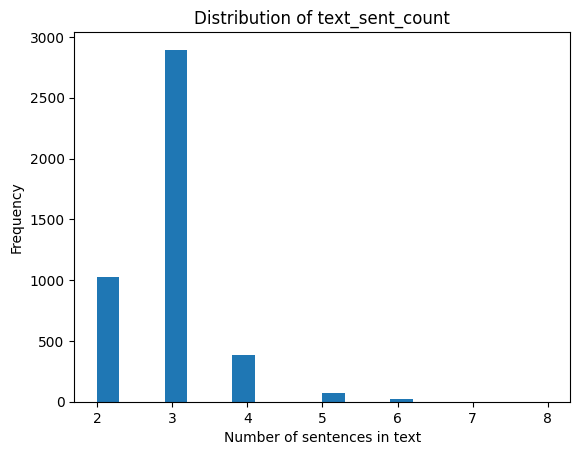

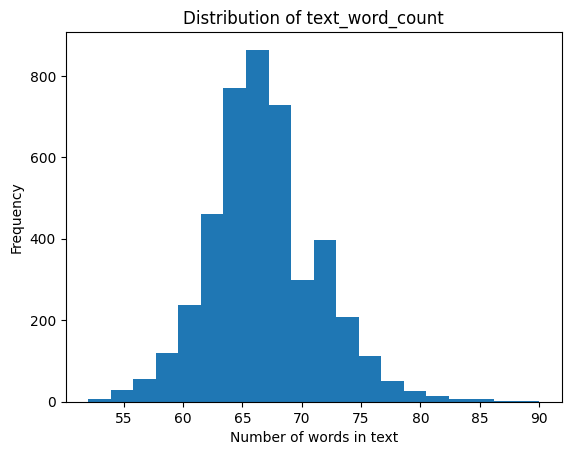

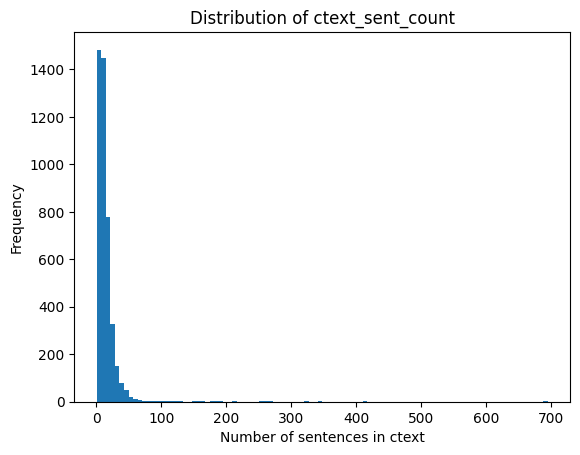

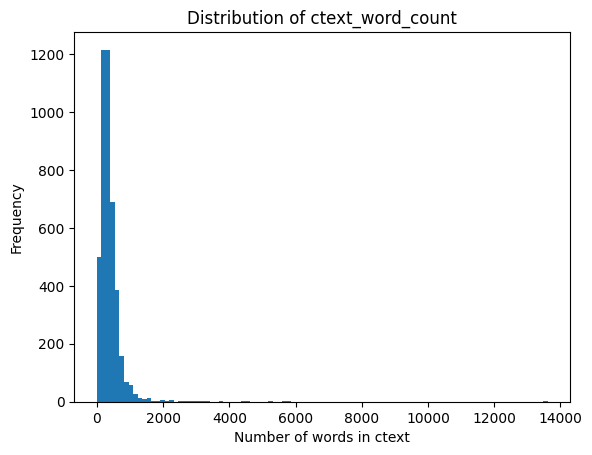

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of text_sent_count
plt.hist(news_data['text_sent_count'], bins=20)
plt.xlabel('Number of sentences in text')
plt.ylabel('Frequency')
plt.title('Distribution of text_sent_count')
plt.show()

# Plot the distribution of text_word_count
plt.hist(news_data['text_word_count'], bins=20)
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.title('Distribution of text_word_count')
plt.show()

# Plot the distribution of ctext_sent_count
plt.hist(news_data['ctext_sent_count'], bins=100)
plt.xlabel('Number of sentences in ctext')
plt.ylabel('Frequency')
plt.title('Distribution of ctext_sent_count')
plt.show()

# Plot the distribution of ctext_word_count
plt.hist(news_data['ctext_word_count'], bins=100)
plt.xlabel('Number of words in ctext')
plt.ylabel('Frequency')
plt.title('Distribution of ctext_word_count')
plt.show()


In [ ]:
# prompt: Write a code to check value count of text_sent_count, text_word_count, ctext_sent_count, ctext_word_count

print(news_data['text_sent_count'].value_counts())
print(news_data['text_word_count'].value_counts())
print(news_data['ctext_sent_count'].value_counts())
print(news_data['ctext_word_count'].value_counts())


3    2895
2    1023
4     388
5      69
6      19
8       1
7       1
Name: text_sent_count, dtype: int64
66    456
65    410
67    408
68    397
64    360
69    331
70    300
63    268
71    218
62    193
72    180
61    134
73    120
60    103
74     89
59     75
75     73
58     45
76     39
57     29
77     28
56     26
78     22
79     20
55     19
54     10
81      8
82      7
80      6
53      4
86      4
84      3
83      3
85      2
87      2
52      2
90      1
89      1
Name: text_word_count, dtype: int64
6     268
5     247
10    244
7     239
8     238
     ... 
54      1
92      1
96      1
85      1
98      1
Name: ctext_sent_count, Length: 102, dtype: int64
229    19
211    17
190    16
135    16
287    16
       ..
977     1
73      1
27      1
690     1
785     1
Name: ctext_word_count, Length: 932, dtype: int64


In [ ]:
news_data['ctext_word_count'].value_counts().head(50)

229    19
211    17
190    16
135    16
287    16
208    16
237    16
241    16
238    16
587    15
296    15
236    14
147    14
349    14
178    14
158    14
387    14
218    14
320    13
295    13
393    13
216    13
306    13
233    13
328    13
270    13
307    13
278    13
273    13
341    13
259    13
309    13
342    13
362    13
205    13
210    12
335    12
105    12
372    12
358    12
252    12
141    12
419    12
272    12
340    12
368    12
256    12
215    12
290    12
284    12
Name: ctext_word_count, dtype: int64

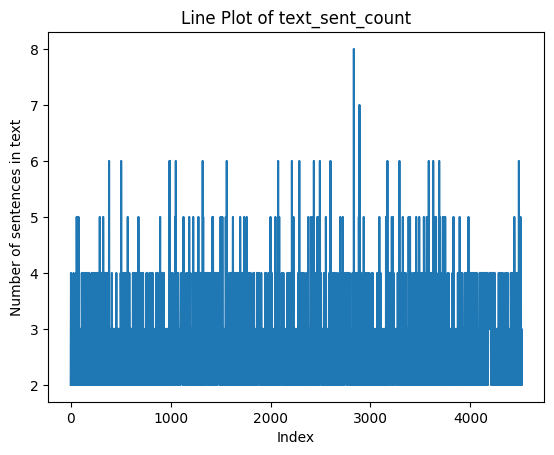

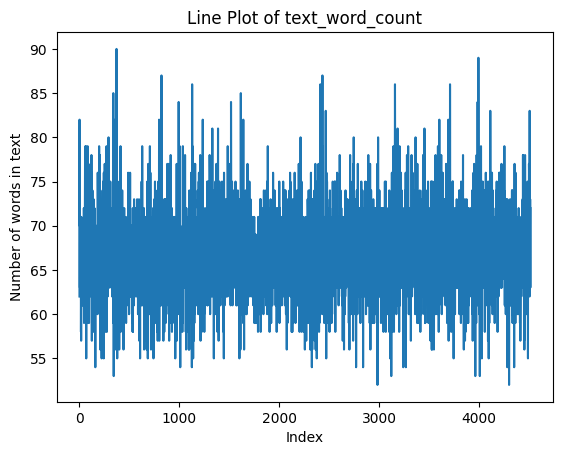

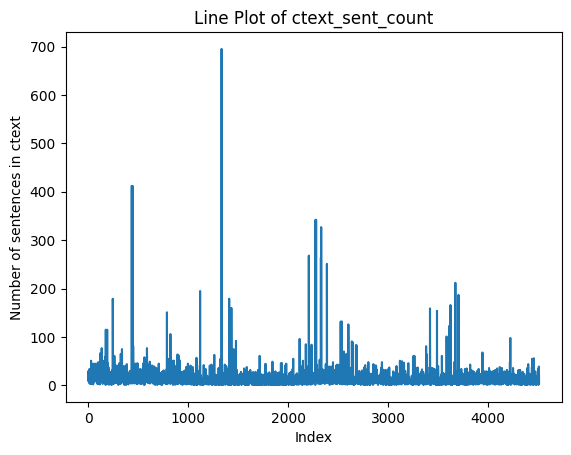

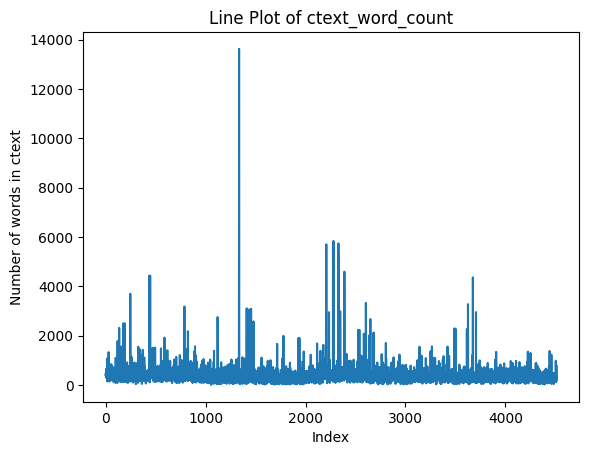

In [ ]:
import matplotlib.pyplot as plt
# Line plot for text_sent_count
plt.plot(news_data['text_sent_count'])
plt.xlabel('Index')
plt.ylabel('Number of sentences in text')
plt.title('Line Plot of text_sent_count')
plt.show()

# Line plot for text_word_count
plt.plot(news_data['text_word_count'])
plt.xlabel('Index')
plt.ylabel('Number of words in text')
plt.title('Line Plot of text_word_count')
plt.show()

# Line plot for ctext_sent_count
plt.plot(news_data['ctext_sent_count'])
plt.xlabel('Index')
plt.ylabel('Number of sentences in ctext')
plt.title('Line Plot of ctext_sent_count')
plt.show()

# Line plot for ctext_word_count
plt.plot(news_data['ctext_word_count'])
plt.xlabel('Index')
plt.ylabel('Number of words in ctext')
plt.title('Line Plot of ctext_word_count')
plt.show()


In [ ]:
# Find the value under which 95% of values lies for text_word_count
text_word_count_95th_percentile = news_data['text_word_count'].quantile(0.95)

# Find the value under which 95% of values lies for text_sent_count
text_sent_count_95th_percentile = news_data['text_sent_count'].quantile(0.95)

# Find the value under which 95% of values lies for ctext_word_count
ctext_word_count_95th_percentile = news_data['ctext_word_count'].quantile(0.95)

# Find the value under which 95% of values lies for ctext_sent_count
ctext_sent_count_95th_percentile = news_data['ctext_sent_count'].quantile(0.95)

# Print the results
print(f"95th percentile of text_word_count: {text_word_count_95th_percentile}")
print(f"95th percentile of text_sent_count: {text_sent_count_95th_percentile}")
print(f"95th percentile of ctext_word_count: {ctext_word_count_95th_percentile}")
print(f"95th percentile of ctext_sent_count: {ctext_sent_count_95th_percentile}")


95th percentile of text_word_count: 74.0
95th percentile of text_sent_count: 4.0
95th percentile of ctext_word_count: 851.5
95th percentile of ctext_sent_count: 35.0


In [ ]:
filtered_data = news_data[
    (news_data['text_word_count'] <= 72) &
    (news_data['text_sent_count'] <= 5) &
    (news_data['ctext_word_count'] <= 663) &
    (news_data['ctext_sent_count'] <= 26)
]

num_records = len(filtered_data)

print(f"Number of records meeting the criteria: {num_records}")

Number of records meeting the criteria: 3510


In [ ]:
filtered_news_data = news_data[
    (news_data['text_word_count'] <= 74) &
    (news_data['text_sent_count'] <= 5) &
    (news_data['ctext_word_count'] <= 852) &
    (news_data['ctext_sent_count'] <= 35)
]

num_records = len(filtered_news_data)

print(f"Number of records meeting the criteria: {num_records}")

Number of records meeting the criteria: 3916


In [ ]:
filtered_news_data

,text,ctext,text_len,ctext_len,text_sent_count,text_word_count,ctext_sent_count,ctext_word_count
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,358,2313,2,62,16,413
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,398,2112,3,70,18,379
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,366,3249,3,67,8,569
5,A 32-year-old man on Wednesday was found hangi...,An alleged suspect in a kidnapping case was fo...,347,2247,3,63,23,440
6,The Delhi High Court reduced the compensation ...,"In an interesting ruling, the Delhi high court...",361,2367,3,70,11,444
...,...,...,...,...,...,...,...,...
4507,After emerging as the single largest party in ...,As uncertainty loomed large in the BMC polls d...,335,606,3,66,1,115
4509,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...",361,1000,3,70,8,200
4510,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...,362,933,2,63,3,158
4512,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...,387,1397,3,63,9,233


In [ ]:
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re

# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# def preprocess_text(text):
#     # Remove URLs
#     text = re.sub(r'http\S+', '', text)
#     # Remove HTML tags
#     text = re.sub(r'<.*?>', '', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Remove punctuation, except for full stops
#     text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)
    # return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove all punctuation except full stop
    text = re.sub(r'[^\w\s.]', '', text)

    text = re.sub(r'(?<=[.!?])(?![ ])', r' ', text)

    # Tokenize sentences
    sentences = sent_tokenize(text)

    # Tokenize words, remove stopwords, and lemmatize
    preprocessed_sentences = []
    for sentence in sentences:
        # Tokenize words
        words = word_tokenize(sentence.lower())

        # # Remove stopwords
        # stop_words = set(stopwords.words('english'))
        # words = [word for word in words if word not in stop_words]

        # # Lemmatization
        # lemmatizer = WordNetLemmatizer()
        # words = [lemmatizer.lemmatize(word) for word in words]

        # Join words back into sentence
        preprocessed_sentence = ' '.join(words)
        preprocessed_sentences.append(preprocessed_sentence)

    # Join preprocessed sentences with proper spacing
    preprocessed_text = ' '.join(preprocessed_sentences)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
# text_sentences = [[preprocess_text(sent) for sent in sent_tokenize(text)] for text in filtered_news_data['ctext']]
# processed_text_sentences = []
# for sentences in text_sentences:
#   processed_text_sentence = " ".join(sentences)
#   processed_text_sentences.append(processed_text_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Assuming you have a DataFrame named 'df' with a column 'text'
filtered_news_data['preprocessed_text'] = filtered_news_data['text'].apply(preprocess_text)
filtered_news_data['preprocessed_ctext'] = filtered_news_data['ctext'].apply(preprocess_text)

<ipython-input-88-403a11a8c556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_news_data['preprocessed_text'] = filtered_news_data['text'].apply(preprocess_text)
<ipython-input-88-403a11a8c556>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_news_data['preprocessed_ctext'] = filtered_news_data['ctext'].apply(preprocess_text)


In [ ]:
filtered_news_data['preprocessed_ctext'][0]

'the daman and diu administration on wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media . the union territorys administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace . it has been decided to celebrate the festival of rakshabandhan on august 7 . in this connection all offices departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues the order issued on august 1 by gurpreet singh deputy secretary personnel had said . to ensure that no one skipped office an attendance report was to be sent to the government the next evening . the two notifications one mandating the celebration of rakshabandhan left and the other withdrawing the mandate right were issued by the daman and diu a

In [ ]:
len(sent_tokenize(filtered_news_data['preprocessed_ctext'][0]))

17

In [ ]:
filtered_news_data

,text,ctext,text_len,ctext_len,text_sent_count,text_word_count,ctext_sent_count,ctext_word_count,preprocessed_text,preprocessed_ctext
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,358,2313,2,62,16,413,the administration of union territory daman an...,the daman and diu administration on wednesday ...
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,398,2112,3,70,18,379,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,366,3249,3,67,8,569,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...
5,A 32-year-old man on Wednesday was found hangi...,An alleged suspect in a kidnapping case was fo...,347,2247,3,63,23,440,a 32yearold man on wednesday was found hanging...,an alleged suspect in a kidnapping case was fo...
6,The Delhi High Court reduced the compensation ...,"In an interesting ruling, the Delhi high court...",361,2367,3,70,11,444,the delhi high court reduced the compensation ...,in an interesting ruling the delhi high court ...
...,...,...,...,...,...,...,...,...,...,...
4507,After emerging as the single largest party in ...,As uncertainty loomed large in the BMC polls d...,335,606,3,66,1,115,after emerging as the single largest party in ...,as uncertainty loomed large in the bmc polls d...
4509,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...",361,1000,3,70,8,200,fruit juice concentrate maker rasna is eyeing ...,mumbai feb 23 pti fruit juice concentrate make...
4510,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...,362,933,2,63,3,158,former indian cricketer sachin tendulkar atten...,former cricketer sachin tendulkar was spotted ...
4512,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...,387,1397,3,63,9,233,the maharashtra government has initiated an in...,maharahstra power minister chandrashekhar bawa...


In [ ]:
filtered_news_data.to_csv('/content/drive/MyDrive/Datasets/filtered_news_data.csv')